### FEATURE SELECTION:
#question - shall we split dataset before feature selection to avoid overfitting(?)

0. For feature selection I will choose only numerical features.

In [19]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
limiter=6000
data_path = "/Users/patrycjapiechowicz/Downloads/sample_data_6k (1).jsonl"
import scipy.stats as stats
from scipy.stats import chi2_contingency
with open(data_path) as file:
  data = [json.loads(next(file)) for x in range(limiter)]

In [20]:
df=pd.DataFrame(data)

In [21]:
df.sample(1)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
4861,695dded0ddf2b10cfe4e9d241ece6b6bacc92116a1b18c...,bb31ff9b9baa328fdbe92feff93789da,2018-07,0,,"[31895, 2288, 1719, 1679, 2376, 961, 807, 1010...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1450, 'avlength': 10.1724137931...","{'size': 258048, 'vsize': 208896, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Tl...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sha256           6000 non-null   object
 1   md5              6000 non-null   object
 2   appeared         6000 non-null   object
 3   label            6000 non-null   int64 
 4   avclass          6000 non-null   object
 5   histogram        6000 non-null   object
 6   byteentropy      6000 non-null   object
 7   strings          6000 non-null   object
 8   general          6000 non-null   object
 9   header           6000 non-null   object
 10  section          6000 non-null   object
 11  imports          6000 non-null   object
 12  exports          6000 non-null   object
 13  datadirectories  6000 non-null   object
dtypes: int64(1), object(13)
memory usage: 656.4+ KB


In [23]:
df_strings=df.strings.apply(pd.Series)

In [24]:
df_general=df.general.apply(pd.Series)

In [25]:
#Concatenate original df + unpacked general and strings
data_all=pd.concat([df,df_general,df_strings], axis=1)

In [50]:
data_all.sample(1)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,...,symbols,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
2570,7f2a353aa013ff00cfcd1ab2b6d18a28e50c6bc243ac9b...,af4b1ae5d458e442202e853a8e32104a,2018-03,1,vtflooder,"[1960, 468, 403, 479, 454, 443, 405, 411, 409,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 513, 'avlength': 5.760233918128...","{'size': 107008, 'vsize': 233472, 'has_debug':...","{'coff': {'timestamp': 2707414, 'machine': 'I3...",...,0,513,5.760234,"[37, 23, 33, 33, 62, 33, 34, 22, 32, 33, 27, 3...",2955,6.544609,0,0,0,3


In [73]:
data_to_analyse=data_all[['label','size','vsize','symbols','numstrings','avlength','printables','entropy','paths','urls','registry','MZ']]

1. Constant features - are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.

In [77]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(data_to_analyse)
sum(sel.get_support())

12

In [78]:
print(
    len([
        x for x in data_to_analyse.columns
        if x not in data_to_analyse.columns[sel.get_support()]
    ]))

[x for x in data_to_analyse.columns if x not in data_to_analyse.columns[sel.get_support()]]

0


[]

2. Quasi-constant features - are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target.

In [79]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(data_to_analyse)
sum(sel.get_support())

12

In [80]:
print(
    len([
        x for x in data_to_analyse.columns
        if x not in data_to_analyse.columns[sel.get_support()]
    ]))

[x for x in data_to_analyse.columns if x not in data_to_analyse.columns[sel.get_support()]]

0


[]

3. Duplicated features- identifying and removing duplicated, and therefore redundant features, is an first step towards feature selection

In [82]:
data_to_analyse.duplicated().sum()

40

In [83]:
data_to_analyse[data_to_analyse.duplicated()]

,label,size,vsize,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
676,0,4096,12288,0,4,14.250000,57,4.404366,0,0,0,1
733,0,4096,12288,0,4,14.250000,57,4.404366,0,0,0,1
778,0,2048,8192,0,4,58.500000,234,3.811827,0,0,0,1
1023,0,61440,90112,0,176,8.875000,1562,6.033158,0,0,0,1
1253,0,61440,90112,0,176,8.875000,1562,6.033158,0,0,0,1
1372,1,217080,245760,0,1599,14.712320,23525,6.004437,0,0,0,7
1486,-1,6144,24576,0,49,16.469388,807,5.348996,0,0,0,1
1525,-1,61440,90112,0,176,8.875000,1562,6.033158,0,0,0,1
1549,0,417152,512000,0,1611,14.555556,23449,5.822021,0,8,0,3
1628,1,151818,380928,0,711,41.082982,29210,5.266665,0,0,0,3


In [91]:
data_to_analyse[data_to_analyse['size']==2048]

,label,size,vsize,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
412,0,2048,8192,0,3,59.000000,177,3.894076,0,0,0,1
668,0,2048,8192,0,4,58.500000,234,3.811827,0,0,0,1
713,0,2048,8192,0,4,81.500000,326,3.584610,0,0,0,1
778,0,2048,8192,0,4,58.500000,234,3.811827,0,0,0,1
806,0,2048,8192,0,4,48.500000,194,3.947194,0,0,0,1
809,0,2048,8192,0,3,75.000000,225,3.726690,0,0,0,1
889,0,2048,8192,0,3,120.333333,361,3.452105,0,0,0,1
952,0,2048,8192,0,3,41.666667,125,4.169221,0,0,0,1
5899,0,2048,8192,0,3,59.000000,177,3.894076,0,0,0,1


4. Correlation - "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other"

In [92]:
corrmat = data_to_analyse.corr()

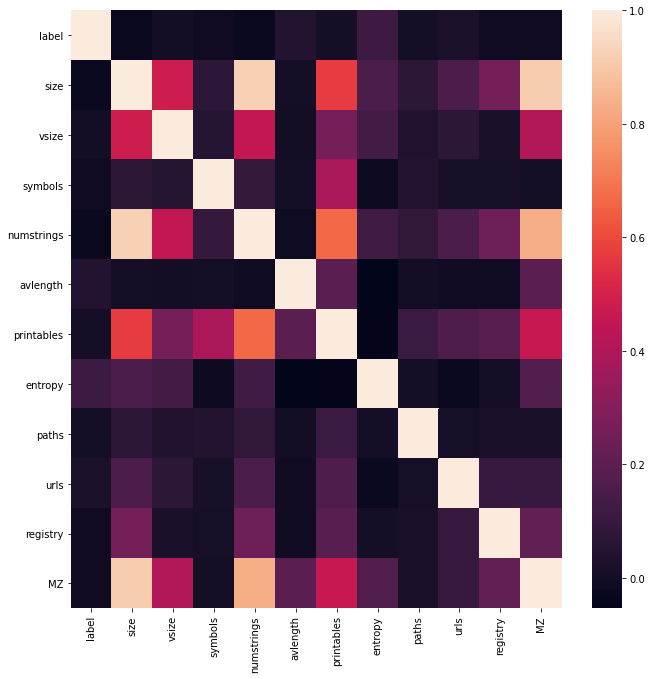

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [96]:
#To remove correlated features first approach:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [103]:
correlation(data_to_analyse, 0.8)

{'MZ', 'numstrings'}

In [106]:
#To find groups for investigation:

In [105]:
corrmat = data_to_analyse.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,size,numstrings,0.923921
1,numstrings,size,0.923921
2,MZ,size,0.911004
3,size,MZ,0.911004
4,MZ,numstrings,0.833880


5. Information gain - measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

In [107]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [114]:
mi = mutual_info_classif(data_to_analyse.drop('label', axis=1), data_to_analyse['label'])
mi

array([0.12315549, 0.11352331, 0.00405146, 0.09638174, 0.1126121 ,
       0.08581327, 0.10708302, 0.00198442, 0.05435897, 0.00626325,
       0.06624055])

In [118]:
data_to_analyse.columns

Index(['label', 'size', 'vsize', 'symbols', 'numstrings', 'avlength',
       'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ'],
      dtype='object')

In [119]:
mi = pd.Series(mi)
mi.index = data_to_analyse.drop('label', axis=1).columns
mi.sort_values(ascending=False)

size          0.123155
vsize         0.113523
avlength      0.112612
entropy       0.107083
numstrings    0.096382
printables    0.085813
MZ            0.066241
urls          0.054359
registry      0.006263
symbols       0.004051
paths         0.001984
dtype: float64

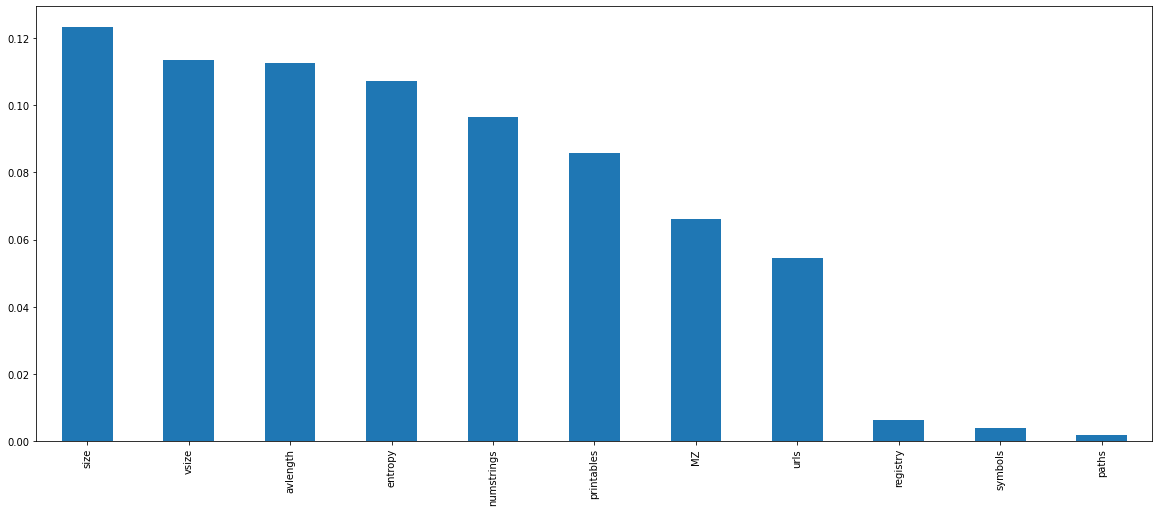

In [120]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [123]:
sel_ = SelectKBest(mutual_info_classif, k=6).fit(data_to_analyse.drop('label', axis=1), data_to_analyse['label'])
data_to_analyse.drop('label', axis=1).columns[sel_.get_support()]

Index(['size', 'vsize', 'numstrings', 'avlength', 'printables', 'entropy'], dtype='object')